In [2]:
from prob140 import *
from datascience import *
import numpy as np
from scipy import special

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

# Homework 1 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### How to Do Your Homework ###
The point of homework is for you to try your hand at using what you've learned in class. The steps to follow:

- Go to lecture and sections, and also go over the relevant text sections before starting on the homework. This will remind you what was covered in class, and the text will typically contain examples not covered in lecture. The weekly Preparation Guide will list what you should read.
- Work on some of the practice problems before starting on the homework.
- Attempt the homework problems by yourself with the text, section work, and practice materials all at hand. Sometimes the week's lab will help as well. The two steps above will help this step go faster and be more fruitful.
- At this point, seek help if you need it. Don't ask how to do the problem — ask how to get started, or for a nudge to get you past where you are stuck.
- For a good measure of your understanding, keep track of the fraction of the homework you can do by yourself or with minimal help. It's a better measure than your homework score, and only you can measure it.

### Rules for Homework ###
- Every answer should contain a calculation or reasoning. For example, a calculation such as $(1/3)(0.8) + (2/3)(0.7)$ or `sum([(1/3)*0.8, (2/3)*0.7])`is fine without further explanation or simplification. If we want you to simplify, we'll ask you to. But just ${5 \choose 2}$ by itself is not fine; write "we want any 2 out of the 5 frogs and they can appear in any order" or whatever reasoning you used. Reasoning can be brief and abbreviated, e.g. "product rule" or "not mutually excl."
- You may consult others (see "How to Do Your Homework" above) but you must write up your own answers using your own words, notation, and sequence of steps.
- We'll be using Gradescope. You must submit the homework according to the instructions in at the end of homework set.

### 1. First Repeat ###
Suppose you roll a die rolled repeatedly. Remember that in this class, dice are assumed fair unless the description says otherwise.

For $k = 1, 2, 3, \ldots, 6 $ let $D_k$ be the event that the first $k$ rolls all show different faces. 

**a)** For $k = 1, 2, 3, \ldots, 6 $ let $D_k$ be the event that the first $k$ rolls all show different faces. Note that $P(D_1) = 0$ because you can't have different faces with just one roll.

Without doing any calculations, draw a Venn diagram that shows the events $D_4$ and $D_5$. Make it clear which is which, and justify your answer. Then enter one of the symbols $\le$, $=$, and $\ge$ in the blank below.

$P(D_5) ~ \underline{~~~~~~~~~~} P(D_4)$

**b)** For $k = 2, 3, \ldots, 7$ let $F_k$ be the event that the $k$th roll is the first time you see a face that has already appeared. Write the event $F_k$ in terms of the events $D_1, D_2, \ldots, D_6$.



**c)** In the Venn diagram that you drew in Part **a**, there's a region that corresponds to one of the events $F_i$ for some $i$.  Say which $i$ it is, and shade that event $F_i$ in your diagram. There's no need to draw a new diagram. Just shade the appropriate region in the diagram you already drew.

**d)** Thus far, you haven't used any fractions – just logic. Now for some calculation. In the code cell below, define a function `prob_D` that takes $k$ as its argument and returns $P(D_k)$.

In [ ]:
#student
def prob_D(k):
    rolls = np.arange(k)
    return ...

In [10]:
#solution
def prob_D(k):
    rolls = np.arange(k)
    return np.prod( (6 - rolls) / 6 )

Run the cell below to make sure that it is consistent with your answer to Part **a**.

In [ ]:
#student
prob_D(4), prob_D(5)

In [11]:
#solution
prob_D(4), prob_D(5)

(0.2777777777777778, 0.09259259259259259)

**d)** In the code cell below, define a function `prob_F` that takes $k$ as its argument and returns $P(F_k)$. Use your function `prob_D` in your definition. 

Then use `apply` to complete the table `first_repeat`. Its first column contains $k$ and its second column should contain $P(F_k)$. For a reminder of the use of `apply`, see the definition of the array `different` in [Section 1.4](http://prob140.org/textbook/chapters/Chapter_01/04_Birthday_Problem).

In [ ]:
#student
first_repeat = Table().with_column('k', np.arange(2, 8))

def prob_F(k):
    return ...

all_probs_F_k = ...apply...

first_repeat = first_repeat.with_column('P(F_k)', all_probs_F_k)

first_repeat


In [12]:
#solution
first_repeat = Table().with_column('k', np.arange(2, 8))

def prob_F(k):
    return prob_D(k-1) - prob_D(k)

all_probs_F_k = first_repeat.apply(prob_F, 'k')

first_repeat = first_repeat.with_column('P(F_k)', all_probs_F_k)

first_repeat

k,P(F_k)
2,0.166667
3,0.277778
4,0.277778
5,0.185185
6,0.0771605
7,0.0154321


**e)** Run the cell below. If you created `all_probs_F_k` correctly, the sum should be a recognizable special value. Explain why the sum comes out that way.

In [13]:
sum(all_probs_F_k)

1.0

#solution

### [Student Solution] First Repeat ###

**a)** $D_5 \subseteq D_4$ because if the first five rolls are all different then the first four had to be different. In the blank: $\le$

**b)** $F_k = D_{k-1} \backslash D_k$

**c)** $i=5$. It's the ring of points that are in $D_4$ but not in $D_5$.

**e)** The first repetition has to happen somewhere in the rolls 2 through 7. Also first repetition can't happen on two different rolls, so $F_2, F_2, \ldots, F_7$ are mutually exclusive. So the probabilities add up to 1. 

You can also establish this algebraically using Part **b** and the difference rule, but the solution above is more illuminating.

### 2. A Different Approximation ###

At the end of [Section 1.5](http://prob140.org/textbook/chapters/Chapter_01/05_An_Exponential_Approximation) of the textbook, an approximate value of the chance of a collison in $n$ trials involving $N$ available codes is:

Approximation 1:
$$
P(\text{collision}) ~ \sim ~ 1 - e^{-\frac{n^2}{2N}}
$$

A simpler approximation that is often used is Approximation 2:

$$
P(\text{collision}) ~ \approx ~ \frac{n^2}{2N}
$$

See [Wikipedia](https://en.wikipedia.org/wiki/Birthday_attack#Simple_approximation), for example, and keep in mind that their $H$ is our $N$.

**a)** Derive Approximation 2 from Approximation 1. Refer to [properties of the exponential function](http://prob140.org/resources/exponential_approximations/) if you need to.

**b)** As you have seen, for $N = 365$ the chance of a collision is just over 0.5 when $n = 23$. Use Approximation 2 to find an approximate value of $n$ by setting $P(\text{collision})$ to be 0.5 and $N$ to be 365. Use the code cell below.

In [ ]:
#student
N = 365
p_collision = 0.5

"""Note: The value of n below is an approximation"""

n = ...
n

In [15]:
#solution
N = 365
p_collision = 0.5

"""Note: The value of n below is an approximation"""

n = (p_collision * 2*N) ** 0.5
n

19.1049731745428

**c)** The answer to **b** is not great as an approximation to 23, but it's not terrible either. The simple approximation is a great way to get a rough sense of how many trials you need to for a specified collision probability when $N$ is too large for exact calculations. 

For example, suppose you use a 64-bit hash. Then there are $N = 2^{64} \approx 1.8 \times 10^{19}$ hash values. Use Approximation 2 to find an approximate number of trials $n$ so that the probability of a collision is about 0.25. Use the code cell below to write an expression that evaluates to the numerical value of the $n$ that you found.

In [ ]:
#student

...

In [17]:
#solution
(0.25 * 2 * (2 ** 64)) ** 0.5

3037000499.97605

#solution

### [Student Solution] A Different Approximation ###

**a)** Use the approximation $$e^x \sim 1 + x$$ for small $x$. 

Then $e^{-\frac{n^2}{2N}} \sim 1 - \frac{n^2}{2N}$, so $1 - e^{-\frac{n^2}{2N}} \sim 1 - (1 - \frac{n^2}{2N}) = \frac{n^2}{2N}$.

### 3. Heads in Coin Tossing ###
This is one of the fundamental models of probability theory. Note that unless otherwise specified, coins in this course are assumed to be fair.

This exercise is a series of quick observations. Before you start, look over some of the Combinatorics exercises in the [Math Prerequisites](http://prob140.org/assets/prereq_math_sp19.pdf) set.

Suppose you toss a coin $n$ times and note down the sequence of heads (H) and tails (T). 

Fix an integer $k$ such that $0 \le k \le n$.

**a)** In total, how many possible sequences are there? How many sequences have $k$ heads? 

[That means exactly $k$ heads, now and throughout the course. To answer the second question, it might help to imagine that there are $n$ empty spaces and you have to write the letter H in $k$ of them.]

**b)** What is the chance that you get $k$ heads in your $n$ tosses? Why?

**c)** Does your answer in **b** make sense in the cases $k=0$ and $k=n$? Explain.

**d)** `SciPy` is a Python library for scientific computing. You will be using it a lot in this course. In particular, the `special` module of `SciPy` computes combinatorial terms and has been imported in this notebook. 

To calculate $\binom{n}{k}$, use `special.comb(n, k)`.

In [5]:
# 10 choose 2
special.comb(10, 2)

45.0

Define a function `chance_of_heads` that takes `n` and `k` as its arguments and returns the chance of `k` heads in `n` tosses of a fair coin. Do not use any built-in `SciPy` probability functions; just use your answer to **b**.

We have started the code for you. Try to ignore the fact that we have converted the integer `n` to a `float`. It won't affect `special.comb` and it will help ensure that the calculation is accurate when `n` and `k` are large.

In [ ]:
#student
def chance_of_heads(n, k):
    """Returns the chance of k heads in n tosses of a fair coin"""
    n = float(n)
    return ...

In [6]:
#solution
def chance_of_heads(n, k):
    """Returns the chance of k heads in n tosses of a fair coin"""
    n = float(n)
    return special.comb(n, k) / 2**n

To check whether your function is working correctly, list all possible outcomes of two tosses of a coin and hence calculate P(0 heads), P(1 head), and P(2 heads). You don't have to turn this in, but make sure it agrees with the output of the cell below.

In [7]:
chance_of_heads(2, 0), chance_of_heads(2, 1), chance_of_heads(2, 2)

(0.25, 0.5, 0.25)

**e)** A class has 8 GSIs. Each GSI tosses a coin 20 times and notes the number of heads. Write an expression that evaluates to the chance that none of the GSIs gets exactly 10 heads. Your expression should use your function `chance_of_heads`.

In [ ]:
#student
...

In [8]:
#solution
(1 - chance_of_heads(20, 10)) ** 8

0.21212249859944513

#solution


### [Student Solution] Heads in Coin Tossing ###

**a)** Total $2^n$ (product rule of counting), among which $\binom{n}{k}$ have $k$ heads. You just have to choose $k$ of the $n$ spots in which to write H; the rest are T.

**b)** $\binom{n}{k}/2^n$ because all the sequences are equally likely.

**c)** $k=0$ is the event "all tails" and has chance $1/2^n$, which is consistent with the formula because $\binom{n}{0} = 1$. Do $k=n$ analogously.

### 4. More Approximations ###
While it is great to have exact formulas for probabilities, if the formulas are complicated then it can be hard to tell how big the probabilities are. So it is useful to have good approximations that have simpler forms and can quickly give us a sense of the magnitude.

You have seen one such approximation already in the birthday problem. Here are two more.

**a)** There is a bet for which your chance of winning is $1/M$. The chance is small because $M$ is very large, but you are stubborn and decide to bet anyway. In fact you bet over and over again, hoping for a win. Assume that the bets are independent of each other. What is the smallest number of times you have to bet so that your chance of winning at least once is at least 1/2? Explain why the answer is roughly a linear function of $M$ (when $M$ is large).

**b)** In the previous exercise you found the chance of getting $m$ heads in $2m$ tosses of a coin. The chance involves some factorials, and factorials get large very quickly. *Stirling's approximation* says that for large $n$

$$
n! ~ \sim ~ \sqrt{2 \pi n} \cdot (n/e)^n
$$

where the symbol $\sim$ is read as "is asymptotically equivalent to" and means that the ratio of the two sides goes to 1 as $n$ tends to $\infty$.

Let $m$ be a positive integer. Use Stirling's formula to approximate the chance of getting exactly $m$ heads in $2m$ tosses of a fair coin, and say what the limit is as $m \to \infty$. Later in the course we will see why this doesn't contradict the law of averages.

**c)** For the number of tosses $2m = 50, 100, 150, \ldots, 400$, compare the approximation in **b** to the exact value, as follows. The table `chance_and_approx` starts off with just two columns:

In [9]:
tosses = np.arange(50, 401, 50)
heads = np.arange(25, 201, 25)
chance_and_approx = Table().with_columns('Tosses', tosses,
                                       'Heads', heads)
chance_and_approx

Tosses,Heads
50,25
100,50
150,75
200,100
250,125
300,150
350,175
400,200


Augment the table with a column labeled `Exact Chance` that contains the chance of $m$ heads in $2m$ tosses, and a column labeled `Approximation` that contains the approximation you found in **b**.

Code tips:

- Use `np.pi` for $\pi$
- Use `apply` to get an array of exact chances. See for example the construction of the array `different` in [Section 1.4](http://prob140.org/textbook/chapters/Chapter_01/04_Birthday_Problem) of the textbook.

In [ ]:
#student
def exact_chance(m):
    """Returns P(m heads in 2m tosses)"""
    return chance_of_heads(2*m, m)

exact = ...          # array of exact chances
approx = ...         # array of approximations

chance_and_approx = chance_and_approx.with_columns('Exact Chance', exact,
                                                 'Approximation', approx)
chance_and_approx

In [10]:
#solution
def exact_chance(m):
    """Returns P(m heads in 2m tosses)"""
    return chance_of_heads(2*m, m)

exact = chance_and_approx.apply(exact_chance, 'Heads')
approx = (np.pi * heads) ** -0.5

chance_and_approx = chance_and_approx.with_columns('Exact Chance', exact,
                                                 'Approximation', approx)
chance_and_approx

Tosses,Heads,Exact Chance,Approximation
50,25,0.112275,0.112838
100,50,0.0795892,0.0797885
150,75,0.0650385,0.065147
200,100,0.0563485,0.056419
250,125,0.0504122,0.0504627
300,150,0.0460275,0.0460659
350,175,0.0426183,0.0426487
400,200,0.0398693,0.0398942


That's a great approximation! Run the cell below for a visual comparison.

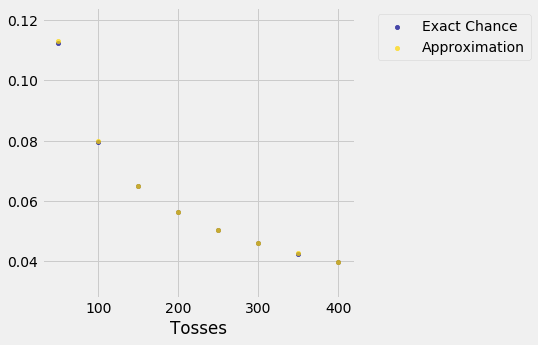

In [11]:
chance_and_approx.drop('Heads').scatter('Tosses')

#solution

### [Student Solution] More Approximations ###

**a)** If you make $n$ bets, the chance of losing them all is $\big{(} 1 - \frac{1}{M} \big{)}^n$. This is allowed to be at most 1/2. Solve the inequality $\big{(} 1 - \frac{1}{M} \big{)}^n \le \frac{1}{2}$ by taking the log on both sides and remembering that the log of a fraction is negative. So $n \ge \frac{\log(1/2)}{\log(1 - 1/M)}$. 

$M$ is large, so the denominator is the log of a number close to 1. Use $\log(1 + x) \sim x$ for small $x$, to get that $n$ should be roughly $\frac{\log(1/2)}{-1/M} = M\log(2) \approx 0.693M$ which is linear in $M$.

In ancient days, gamblers knew from experience that the answer is about 2/3 of $M$. That was some pretty impressive data science on their part, long before logarithms were developed.

**b)** By the previous problem, the chance of $m$ heads in $2m$ tosses is
$$
\frac{(2m)!}{m!m!} \cdot 2^{-2m} ~ \sim ~ \frac{\sqrt{2\pi(2m)} \cdot (2m/e)^{2m}}{2\pi m \cdot (m/e)^{2m}} \cdot 2^{-2m} ~ = ~ \frac{\sqrt{\pi m}}{\pi m} ~ = ~ \frac{1}{\sqrt{\pi m}} ~ \to ~ 0 \text{ as } m \to \infty
$$

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 1 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 1 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**